In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

In [3]:
digits = datasets.load_digits()

8

(1797, 64)

(1797, 8, 8)

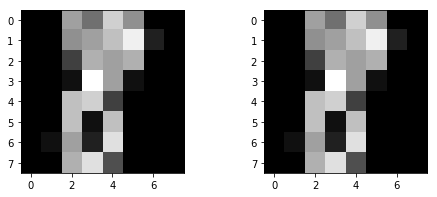

In [20]:
# 如果像素特别高，比如 1024*768 
# 如果像素特别高，需要降维处理
data = digits.data
images = digits.images
target = digits.target

index = 18

# data和images是相同的数据，机器学习采用data格式，显示数据采用images格式
plt.figure(figsize=(8,3))
axes1 = plt.subplot(1,2,1)
axes1.imshow(images[index],cmap='gray')

axes2 = plt.subplot(1,2,2)
axes2.imshow(data[index].reshape((8,8)),cmap='gray')

display(target[index],data.shape,images.shape)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# 拆分训练集和测试集
from sklearn.model_selection import train_test_split

# random_state 保证取值的比例和取值的内容完全一致
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=1)

In [30]:
X_train.shape

(1437, 64)

In [31]:
1437**0.5

37.907782842049734

In [40]:
logistic = LogisticRegression(C=0.01)
knn = KNeighborsClassifier(n_neighbors=7)

logistic.fit(X_train,y_train)
knn.fit(X_train,y_train)

y1_ = logistic.predict(X_test)
y2_ = knn.predict(X_test)

# 可以使用score函数，来计算算法模型的评分
print("Logistic测试集的评分:{}".format(logistic.score(X_test,y_test)))
print("Logistic训练集的评分:{}".format(logistic.score(X_train,y_train)))
print("KNN评分测试集:{}".format(knn.score(X_test,y_test)))
print("KNN评分训练集:{}".format(knn.score(X_train,y_train)))

Logistic测试集的评分:0.9722222222222222
Logistic训练集的评分:0.9784272790535838
KNN评分测试集:0.9972222222222222
KNN评分训练集:0.9867780097425192


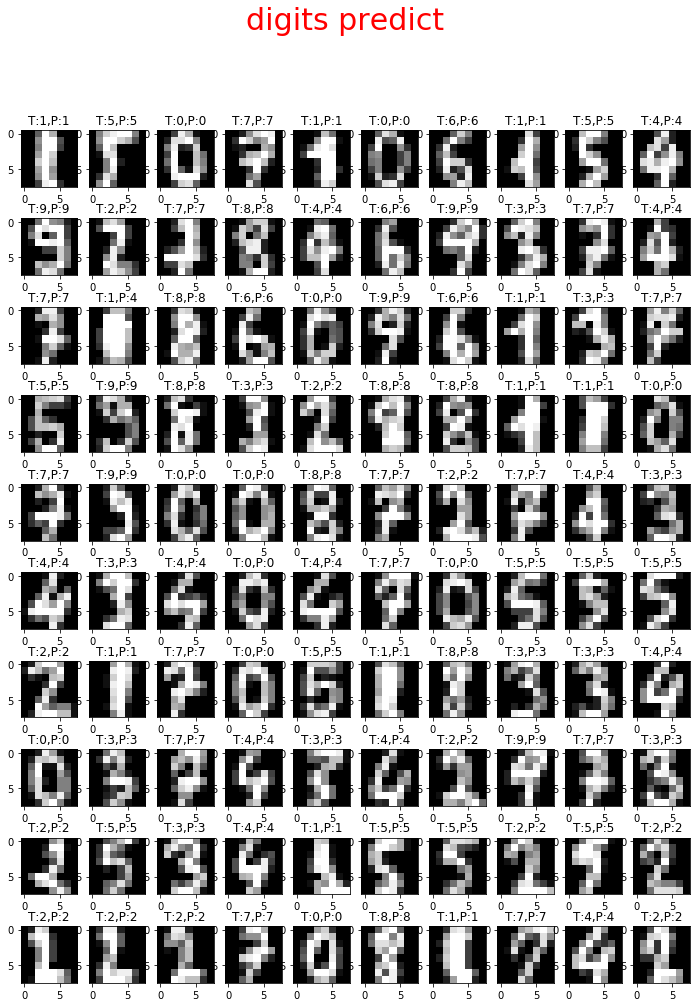

In [45]:
# 展示结果，展示前100个预测数据
figure = plt.figure(figsize=(12,16))
# 添加画布标题
figure.suptitle('digits predict',fontsize=30,color='red')

# 画布位置 1-100
# 预测结果、预测数据的取值0-99
for index in range(100):
    test_data = X_test[index]
    axes = plt.subplot(10,10,index+1)
    axes.imshow(test_data.reshape((8,8)),cmap='gray')
    predict_result = y1_[index]
    true_result = y_test[index]
    title = "T:{},P:{}".format(true_result,predict_result)
    axes.set_title(title)